# QR decomposition

행렬을 대각화 것이 행렬의 고유값과 고유벡터를 구하는 것과 동일한 일임을 알았다. 그러면 효율적인 방법으로 행렬을 대각화할 수 있다면 $n$차 방정식을 푸는 대신 대각화를 통해 고유값 문제를 해결할 수 있다. 대칭행렬 $A$를 대각화하는 과정을 생각하면
$$ D = V^{T} A V.$$
결국은 $V$행렬을 찾아야 한다.

이 과정을 빠르고 효과적으로 할 수 있는 방법이 QR 알고리듬이다. 다음의 과정을 살펴보자. 대칭행렬인 $A=A_0$가 있다. 그러면 이 행렬을 다음처럼 직교행렬($Q$)과 다른 행렬($R$)로 나누어 써보자. 
$$ A_0 = Q_1 R_1$$
$Q$는 직교행렬이므로 역행렬을 다음의 관계식 $Q^{-1}=Q^T$을 이용하여 간단히 구할 수 있다. 따라서 $ R_1 = Q_1^{T} Q_1 R_1 = Q_1^T A_0$이다.
그러면 다음처럼 $A_1$행렬을 정의하면
$$ A_1= R_1 Q_1 = Q_1^{T} A_0 Q_1,$$
$A_1$행렬과 $A_0$행렬의 닮은 변환에 해당한다. 이 과정을 반복하면 다음의 식들을 얻는다.
$$ A_0 = Q_1 R_1, \quad A_1 = R_1 Q_1 = Q_1^T A_0 Q_1$$
$$ A_1 = Q_2 R_2, \quad A_2 = R_2 Q_2 = Q_2^T Q_1^T A_0 Q_1 Q_2$$
$$ A_2 = Q_3 R_3, \quad A_3 = R_3 Q_3 = Q_3^T Q_2^T Q_1^T A_0 Q_1 Q_2 Q_3$$
$$ \cdots $$
$$ A_{k-1} = Q_k R_k, \quad A_k = R_k Q_k = Q_k^T Q_{k-1}^T \cdots Q_2^T Q_1^T A_0 Q_1 Q_2 \cdots Q_{k-1} Q_{k}.$$
이 과정을 충분히 많이 반복하면 $A_k$ 행렬은 대각행렬로 수렴하고 이 때 대각성분이 아이겐밸류에 해당하며 $Q_1 Q_2 \cdots Q_k$ 행렬이 아이겐벡터에 해당한다.  

남아있는 문제는 행렬을 QR행렬로 나누는 과정이다. 이 과정은 다양한 방법을 통해 구현될 수 있으며 간단하게는 Gram-Schmidt 과정을 통해 해결할 수 있다. Gram-Schmidt과정은 주어진 독립적인 벡터들을 정규직교화하는 단순하고 반복적인 과정이다. 자세한 설명은 다음을 참조하자. https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process  

(참고) QR 알고리듬은 대칭행렬이 아닌 경우에도 작동한다. 다만 이 경우에는 최종 결과가 대각행렬이 아닌 삼각행렬이 되며 삼각행렬의 대각성분이 아이겐밸류에 해당한다.

### 예시 

다음의 행렬을 고려하자.
$$A0=\begin{pmatrix} 3 & 4 \\ 4 & 9 \end{pmatrix}. $$
이 행렬의 첫 번째 행은 (3,4)이며 이를 정규화(normalization)하면 
$v_1 = \frac{1}{5} (3,4) $이 된다. 이 벡터와 수직한 벡터를 찾으면 $v_2=\frac{1}{5} (4,-3)$이다. 그러면 이 때 $Q_1$행렬은
$$Q1=\frac{1}{5} \begin{pmatrix} 3 & 4 \\ 4 & -3 \end{pmatrix}. $$
그러면 R1은 다음과 같다.
$$R1=Q_1^T A_0 = \frac{1}{5} \begin{pmatrix} 3 & 4 \\ 4 & -3 \end{pmatrix} \begin{pmatrix} 3 & 4 \\ 4 & 9 \end{pmatrix}=\frac{1}{5} \begin{pmatrix} 25 & 48 \\ 0 & -11 \end{pmatrix} . $$
그러면 $A_1$은
$$A1=R_1 Q_1 =\frac{1}{5} \begin{pmatrix} 25 & 48 \\ 0 & -11 \end{pmatrix} 
\frac{1}{5} \begin{pmatrix} 3 & 4 \\ 4 & -3 \end{pmatrix}. $$
이 과정을 이제 반복해보자.

In [50]:
# 다음의 예시를 살펴보자.
import numpy as np
a0=np.array([[3,4],[4,9]])
q1=np.array([[3,4],[4,-3]])/5
r1=np.dot(np.transpose(q1),a0)
a1=np.dot(r1,q1)
a1

array([[10.68, -1.76],
       [-1.76,  1.32]])

In [51]:
q2=np.array([[10.68/np.sqrt(10.68**2+1.76**2),1.76/np.sqrt(10.68**2+1.76**2)],
             [-1.76/np.sqrt(10.68**2+1.76**2),10.68/np.sqrt(10.68**2+1.76**2)]])
r2=np.dot(np.transpose(q2),a1)
a2=np.dot(r2,q2)
a2

array([[10.99726869, -0.16524411],
       [-0.16524411,  1.00273131]])

In [61]:
def ak(k):
    a=np.array([[3,4],[4,9]])
    qk=np.array([[1,0],[0,1]])
    for i in range(k):
        q=np.array([[a[0][0]/np.sqrt(a[0][0]**2+a[1][0]**2),a[1][0]/np.sqrt(a[0][0]**2+a[1][0]**2)],
                [a[1][0]/np.sqrt(a[0][0]**2+a[1][0]**2),-a[0][0]/np.sqrt(a[0][0]**2+a[1][0]**2)]])
        r=np.dot(np.transpose(q),a)
        a=np.dot(r,q)
        qk=np.dot(q,qk)
    return a,qk

In [62]:
ak(100)

(array([[1.10000000e+001, 4.19401853e-016],
        [1.45131432e-103, 1.00000000e+000]]),
 array([[ 0.4472136 ,  0.89442719],
        [-0.89442719,  0.4472136 ]]))

In [58]:
np.linalg.eig(a0)

(array([ 1., 11.]), array([[-0.89442719, -0.4472136 ],
        [ 0.4472136 , -0.89442719]]))

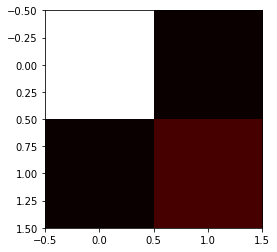

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(ak(100), cmap='hot')